To get a 2D view of the brands originally in the high dimensional emotions space, let's apply a PCA to brand association scores and plot it across the first two PCA dimensions. This helps visualize the brands with maximized variance in the transformed space. Some brands close to each other are circled here, and have similar themes e.g. sportswear. 

In [285]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#read brands and scores from database
with sqlite3.connect(os.path.abspath('database.db')) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name ='association_scores';")
    query = "SELECT * FROM 'association_scores'" 
    df_scores = pd.read_sql_query(query, conn)

with sqlite3.connect(os.path.abspath('database.db')) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name ='brands';")
    query = "SELECT * FROM 'brands'" 
    df_brands = pd.read_sql_query(query, conn)

Choosing the first two PCs, since the first two components explain over 60% of the variance (below), and preserve most information. 

In [286]:
df = df_scores.pivot(index='brand_id', columns='emotion_id', values='score')

#  Standardize: remove mean and scale to unit variance for each feature independently  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# PCA
pca = PCA(n_components= 2)
pca_result = pca.fit(scaled_data)
print('Variance for the first 2 PCs:', pca_result.explained_variance_ratio_)
sum(pca_result.explained_variance_ratio_)

Variance for the first 2 PCs: [0.45047624 0.16285614]


0.6133323869153068

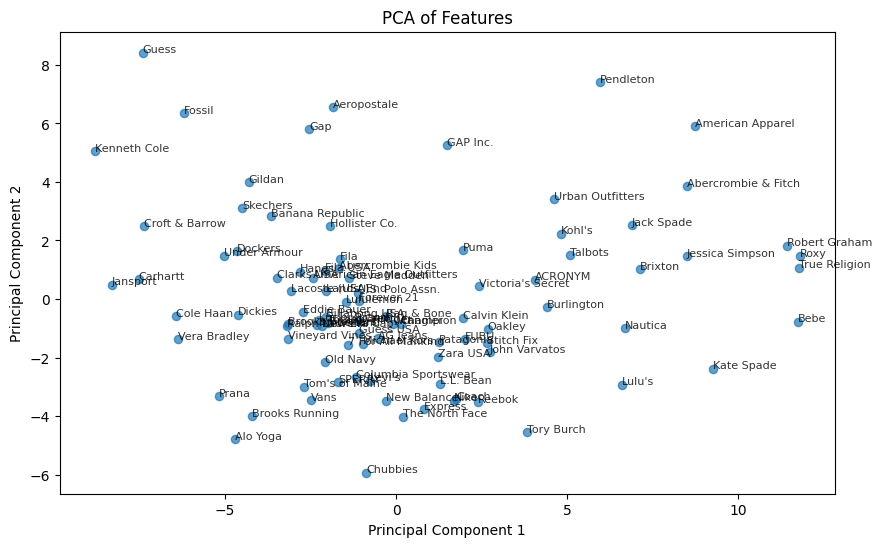

In [287]:
#  Standardize: remove mean and scale to unit variance for each feature independently  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df.reset_index(inplace=True)
pca_df = pd.merge(pca_df,df_brands[['brand_id','name']], left_on='index', right_on='brand_id', how='left')
pca_df.set_index('name', inplace=True)
pca_df = pca_df[['PC1', 'PC2']]

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], 35, alpha=0.7)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add labels to points
for i, name in enumerate(pca_df.index):
    plt.annotate(name, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, alpha=0.8)

plt.show()

Now, is it that clothing brands with similar suitability for specific occasions or applications cluster closely on a PCA plot? 
I randomly found the list of top 10 sportswear brands in the world (https://businesschief.com/corporate-finance/top-10-sportswear-brands-in-the-world), of which 8 are American brands and present in my dataset (excluding 'Adidas' and 'Asics'). Here, the 8 from the list are circled in the plot, below. 

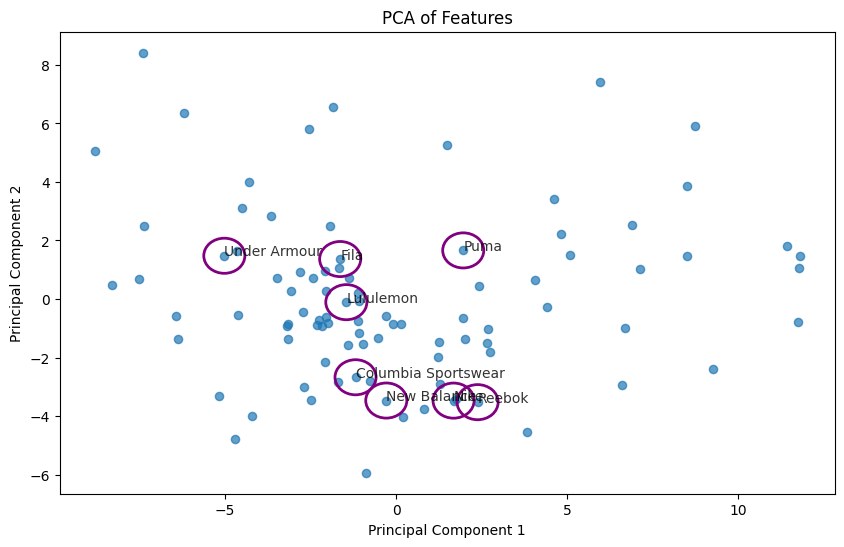

In [288]:
#  Standardize: remove mean and scale to unit variance for each feature independently  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df.reset_index(inplace=True)
pca_df = pd.merge(pca_df,df_brands[['brand_id','name']], left_on='index', right_on='brand_id', how='left')
pca_df.set_index('name', inplace=True)
pca_df = pca_df[['PC1', 'PC2']]

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], 35, alpha=0.7)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Highlight top sportswear brands with a circle
highlight_indices = [i for i in ['Nike','Adidas', 'Puma', 'Lululemon', 'Under Armour', 'New Balance', 'Columbia Sportswear','Fila','Asics',
'Reebok'] if i in pca_df.index]

for i in highlight_indices:
    plt.annotate(i, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=10, alpha=0.8)
    plt.gca().add_patch(plt.Circle((pca_df['PC1'][i], pca_df['PC2'][i]), 0.6, color='purple', fill=False, linewidth=2))  # Adjust radius as needed

plt.show()


In [ ]:
#Generate a fun and general diagram of recommender.py using dall-e-3
from openai import OpenAI
key=os.environ.get('OPENAI_API_KEY')
client = OpenAI(api_key=key)

response = client.images.generate(
  model="dall-e-3",
  prompt="Generate a simple diagram on vector similarity measurement in multi feature space. Features are emotions and vectors are either a clothing brand or a book.",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
image_url